# Trabajo Práctico nro. 2

## Integrantes:

* Grassi Julieta, LU: 179/23
* Grinspun Lara, LU: 503/23
* Tschakalian Tiziana, LU: 916/22

In [ ]:
pip install formulaic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 664.7 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from matplotlib import cm
from time import time
import logging
import os

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from formulaic import model_matrix
from formulaic import Formula

# escaladores
from sklearn.preprocessing import MinMaxScaler    # Herramientas de polinomios
from sklearn.preprocessing import StandardScaler

# Paquetes para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#knn
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Para componentes principales
from sklearn.decomposition import PCA

# Para redes neuronales
import tensorflow as tf
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Preprocesamiento [1 pt.]

###1. Cargar en un DataFrame los datos del archivo FBRef2020-21.csv.

In [ ]:
FBRef = pd.read_csv("/content/drive/MyDrive/tp2 labo/FBRef2020-21.csv")
FBRef.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


In [ ]:
FBRef.shape

(2823, 128)

###2. Eliminar a los jugadores que jugaron menos de 500 minutos en la temporada (columna Min).

In [ ]:
FBRef = FBRef[FBRef["Min"]>=500]
FBRef

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [ ]:
FBRef.shape

(1962, 128)

###3. Eliminar los datos faltantes. Por ejemplo, eliminar columnas con más de 100 datos faltantes y luego las filas con datos faltantes, o convertir los datos faltantes a algún valor apropiado.

In [ ]:
# Eliminamos primero las columnas con más de 100 datos faltantes
nan_cols = FBRef.isna().sum() > 100  # Vector booleano
keep = nan_cols.index[~(nan_cols)] # Lista con los nombres de las columnas para dejar
FBRef = FBRef[keep] # Seleccionamos solo las columnas en keep
FBRef = FBRef.dropna()
FBRef

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [ ]:
FBRef.shape

(1902, 122)

###4. Al finalizar la limpieza de datos, resetear los índices.

In [ ]:
FBRef = FBRef.reset_index(drop = True)
FBRef.shape

(1902, 122)

### 5. Definir el DataFrame data_num que solo contenga las variables númericas, a partir de la columna Ast/90, inclusive. Para clustering y clasificación no vamos a utilizar las variables categóricas ni edad ni minutos jugados.

In [ ]:
FBRef.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min',
       ...
       'PrgDistCarry/90', 'ProgCarry/90', 'CarryIntoThird/90',
       'CarryIntoBox/90', 'Miscontrol/90', 'Dispossessed/90', 'PassTarget/90',
       'PassesReceived/90', 'PassRec%', 'ProgPassReceived/90'],
      dtype='object', length=122)

In [ ]:
# Nos quedamos solo con las variables numéricas
data_num = FBRef.select_dtypes(include='number').drop(["Age", "Min", 'Born', 'MP', 'Starts', '90s'], axis = 1)
data_num.columns

Index(['Ast/90', 'npG/90', 'npG+A/90', 'xA/90', 'npxG/90', 'npxG+xA/90',
       'Shots/90', 'SoTs/90', 'FKSht/90', 'np:G-xG',
       ...
       'PrgDistCarry/90', 'ProgCarry/90', 'CarryIntoThird/90',
       'CarryIntoBox/90', 'Miscontrol/90', 'Dispossessed/90', 'PassTarget/90',
       'PassesReceived/90', 'PassRec%', 'ProgPassReceived/90'],
      dtype='object', length=106)

In [ ]:
data_num.head()

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


#Clustering [4 pts.]

###6. Nuestro primer objetivo es realizar algún agrupamiento de jugadores con características similares.

####a) Seleccionar dos variables cualesquiera de los datos y realizar un gráfico de dispersión de una variable en función de la otra para el total de las observaciones. ¿Pueden encontrar fácilmente grupos distintos?

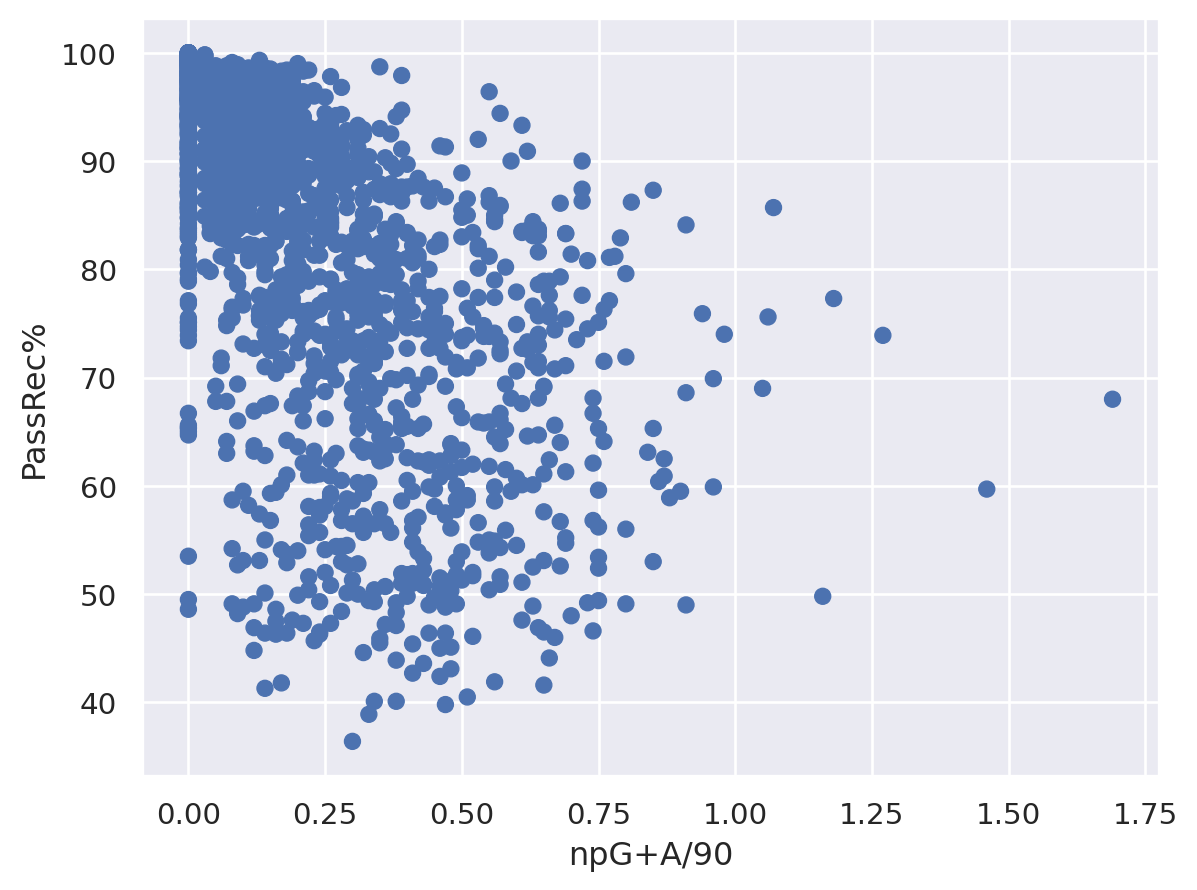

In [ ]:
(
    so.Plot(data_num, x = "npG+A/90", y = "PassRec%"	)
    .add(so.Dot())
)

No vemos ningun grupo definido

####b) Escalar los datos y realizar un análisis de componentes principales, quedándose solo con las dos primeras componentes. Realizar un gráfico como el del punto anterior. ¿Cuántos clusters puede distinguir en el gráfico? ¿A qué características de los jugadores pueden corresponder los clusters? ¿Cómo pueden verificar su conjetura? (realizar una visualización o algún cálculo)

In [ ]:
df_std = StandardScaler().fit_transform(data_num)

In [ ]:
#Hallar las componentes principales
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-2.91448921,  2.25129977],
       [-6.81841064, -1.41378947],
       [-6.47428099, -3.79253435],
       ...,
       [ 6.80094942,  1.47030388],
       [ 6.84863946, -0.87812122],
       [ 2.45963356,  2.03690652]])

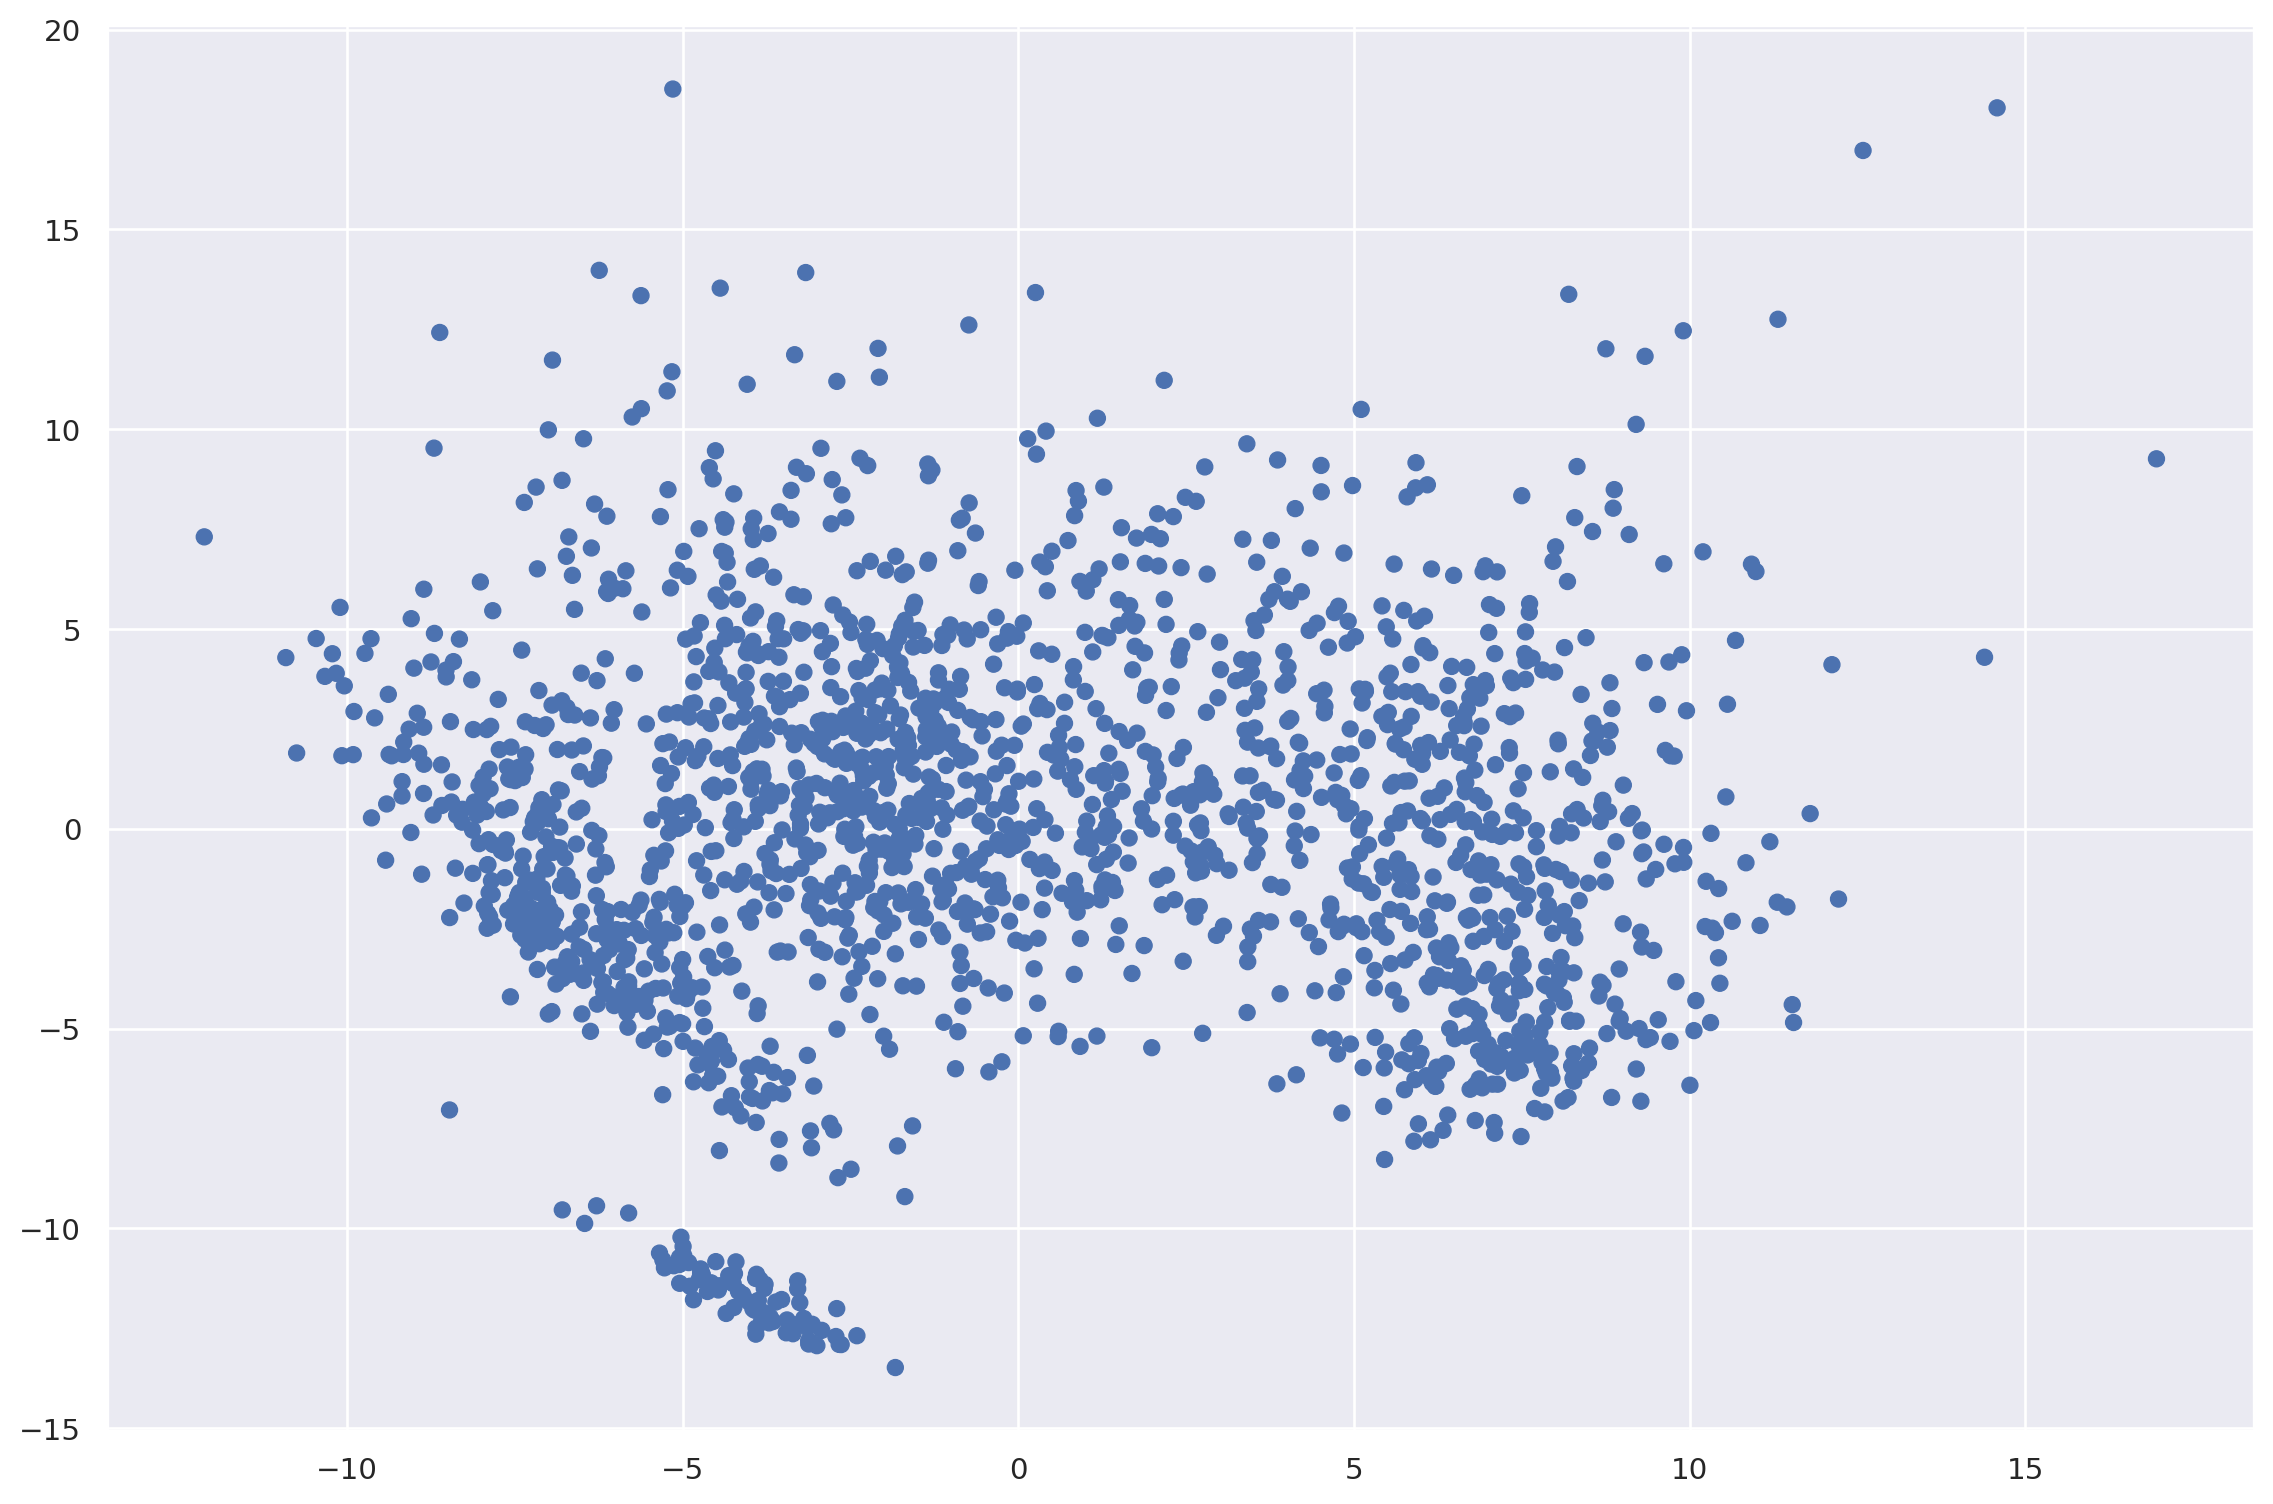

In [ ]:
(
    so.Plot(x = principalComponents[:,0], y = principalComponents[:,1])
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(12,8))
)

Creemos identificar 2 clusters

In [ ]:
clusters= DBSCAN(eps=2, min_samples = 6).fit_predict(principalComponents)

In [ ]:
pd.Series(clusters).value_counts()

 0    1806
 1      80
-1      16
Name: count, dtype: int64

In [ ]:

clusters[1218]

1

In [ ]:
[i for i in range(len(clusters)) if clusters[i] == 1] #analizar estos indices en el dataframe original y ver que tienen en comun!

[1218,
 1219,
 1220,
 1221,
 1222,
 1223,
 1224,
 1225,
 1226,
 1227,
 1228,
 1229,
 1230,
 1231,
 1232,
 1233,
 1234,
 1235,
 1236,
 1237,
 1238,
 1239,
 1240,
 1241,
 1242,
 1243,
 1244,
 1245,
 1246,
 1247,
 1248,
 1249,
 1250,
 1251,
 1252,
 1253,
 1254,
 1255,
 1256,
 1257,
 1258,
 1259,
 1260,
 1261,
 1262,
 1263,
 1264,
 1265,
 1266,
 1267,
 1268,
 1269,
 1270,
 1271,
 1273,
 1274,
 1275,
 1276,
 1277,
 1278,
 1279,
 1280,
 1281,
 1282,
 1283,
 1284,
 1285,
 1286,
 1287,
 1288,
 1289,
 1290,
 1291,
 1292,
 1293,
 1294,
 1295,
 1296,
 1297,
 1298]

In [ ]:
data_num.loc[1298]

Ast/90                   0.0
npG/90                   0.0
npG+A/90                 0.0
xA/90                    0.0
npxG/90                  0.0
                       ...  
Dispossessed/90          0.0
PassTarget/90           28.1
PassesReceived/90       28.1
PassRec%               100.0
ProgPassReceived/90      0.0
Name: 1298, Length: 106, dtype: float64

In [ ]:
data_num.loc[1218]

Ast/90                  0.00
npG/90                  0.03
npG+A/90                0.03
xA/90                   0.00
npxG/90                 0.00
                       ...  
Dispossessed/90         0.00
PassTarget/90          19.90
PassesReceived/90      19.80
PassRec%               99.70
ProgPassReceived/90     0.00
Name: 1218, Length: 106, dtype: float64

In [ ]:
data_num.loc[1262]

Ast/90                  0.0
npG/90                  0.0
npG+A/90                0.0
xA/90                   0.0
npxG/90                 0.0
                       ... 
Dispossessed/90         0.0
PassTarget/90          19.6
PassesReceived/90      19.5
PassRec%               99.8
ProgPassReceived/90     0.0
Name: 1262, Length: 106, dtype: float64

In [ ]:
data_num.loc[1249]

Ast/90                  0.0
npG/90                  0.0
npG+A/90                0.0
xA/90                   0.0
npxG/90                 0.0
                       ... 
Dispossessed/90         0.0
PassTarget/90          32.0
PassesReceived/90      32.0
PassRec%               99.9
ProgPassReceived/90     0.0
Name: 1249, Length: 106, dtype: float64

Los puntos pertenecientes al cluster 1 tienen un valor de PassRec% similar.

In [ ]:
data_num.loc[1217]

Ast/90                  0.23
npG/90                  0.15
npG+A/90                0.38
xA/90                   0.28
npxG/90                 0.15
                       ...  
Dispossessed/90         1.46
PassTarget/90          65.20
PassesReceived/90      52.80
PassRec%               80.90
ProgPassReceived/90     7.08
Name: 1217, Length: 106, dtype: float64

In [ ]:
data_num.loc[3]

Ast/90                  0.00
npG/90                  0.07
npG+A/90                0.07
xA/90                   0.03
npxG/90                 0.05
                       ...  
Dispossessed/90         0.00
PassTarget/90          34.80
PassesReceived/90      33.40
PassRec%               96.00
ProgPassReceived/90     0.59
Name: 3, Length: 106, dtype: float64

Confirmamos que para los puntos que no pertenecen al cluster 1, en principio, tienen valores bastante más distintos que los del cluster 1 para PassRec%

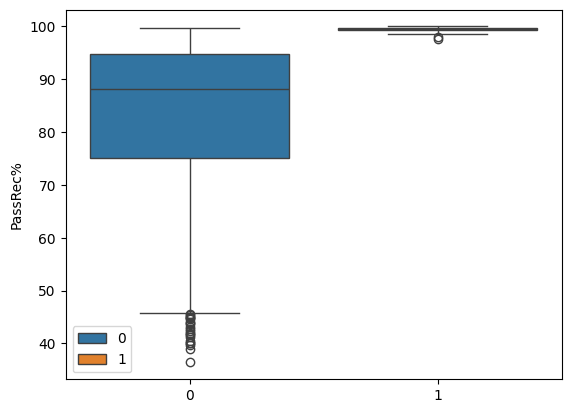

In [ ]:
sns.boxplot(data = data_num[clusters != -1], x=clusters[clusters != -1], y = "PassRec%", hue = clusters[clusters != -1])
plt.show()

In [ ]:
[i for i in range(len(clusters)) if clusters[i] == 0] #analizar estos indices en el dataframe original y ver que tienen en comun!

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
data_num.loc[1002]

Ast/90                  0.10
npG/90                  0.33
npG+A/90                0.43
xA/90                   0.07
npxG/90                 0.39
                       ...  
Dispossessed/90         1.77
PassTarget/90          56.80
PassesReceived/90      24.80
PassRec%               43.60
ProgPassReceived/90     8.20
Name: 1002, Length: 106, dtype: float64

In [ ]:
data_num.loc[980]

Ast/90                  0.11
npG/90                  0.65
npG+A/90                0.75
xA/90                   0.12
npxG/90                 0.48
                       ...  
Dispossessed/90         1.15
PassTarget/90          47.90
PassesReceived/90      25.60
PassRec%               53.40
ProgPassReceived/90     8.46
Name: 980, Length: 106, dtype: float64

In [ ]:
data_num.loc[626]

Ast/90                  0.00
npG/90                  0.06
npG+A/90                0.06
xA/90                   0.00
npxG/90                 0.03
                       ...  
Dispossessed/90         0.37
PassTarget/90          39.10
PassesReceived/90      36.60
PassRec%               93.60
ProgPassReceived/90     0.50
Name: 626, Length: 106, dtype: float64

In [ ]:
data_num.loc[33]

Ast/90                  0.03
npG/90                  0.00
npG+A/90                0.03
xA/90                   0.01
npxG/90                 0.04
                       ...  
Dispossessed/90         0.76
PassTarget/90          55.80
PassesReceived/90      54.90
PassRec%               98.30
ProgPassReceived/90     0.47
Name: 33, Length: 106, dtype: float64

In [ ]:
data_num.loc[273]

Ast/90                  0.21
npG/90                  0.36
npG+A/90                0.57
xA/90                   0.14
npxG/90                 0.24
                       ...  
Dispossessed/90         0.64
PassTarget/90          55.10
PassesReceived/90      47.40
PassRec%               85.90
ProgPassReceived/90     4.18
Name: 273, Length: 106, dtype: float64

Los puntos pertenecientes al cluster 0 tienen un valor de Dispossessed/90  similar.

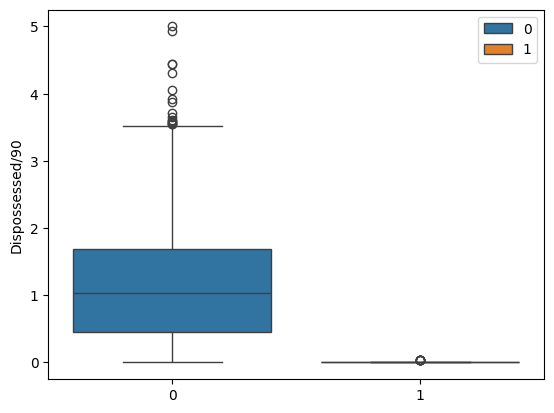

In [ ]:
sns.boxplot(data = data_num[clusters != -1], x=clusters[clusters != -1], y = "Dispossessed/90", hue = clusters[clusters != -1])
plt.show()

Notamos que los clusters pueden estar divididos por estas variables

###c) Para la cantidad de clusters observados en el ítem anterior, realizar un agrupamiento por k-medias, y colorear los puntos segun las etiquetas obtenidas. ¿Coinciden las etiquetas con lo esperado?

In [ ]:
kmeans = KMeans(n_clusters=2)
# Asignamos cada observación a un cluster
cluster = kmeans.fit_predict(principalComponents)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


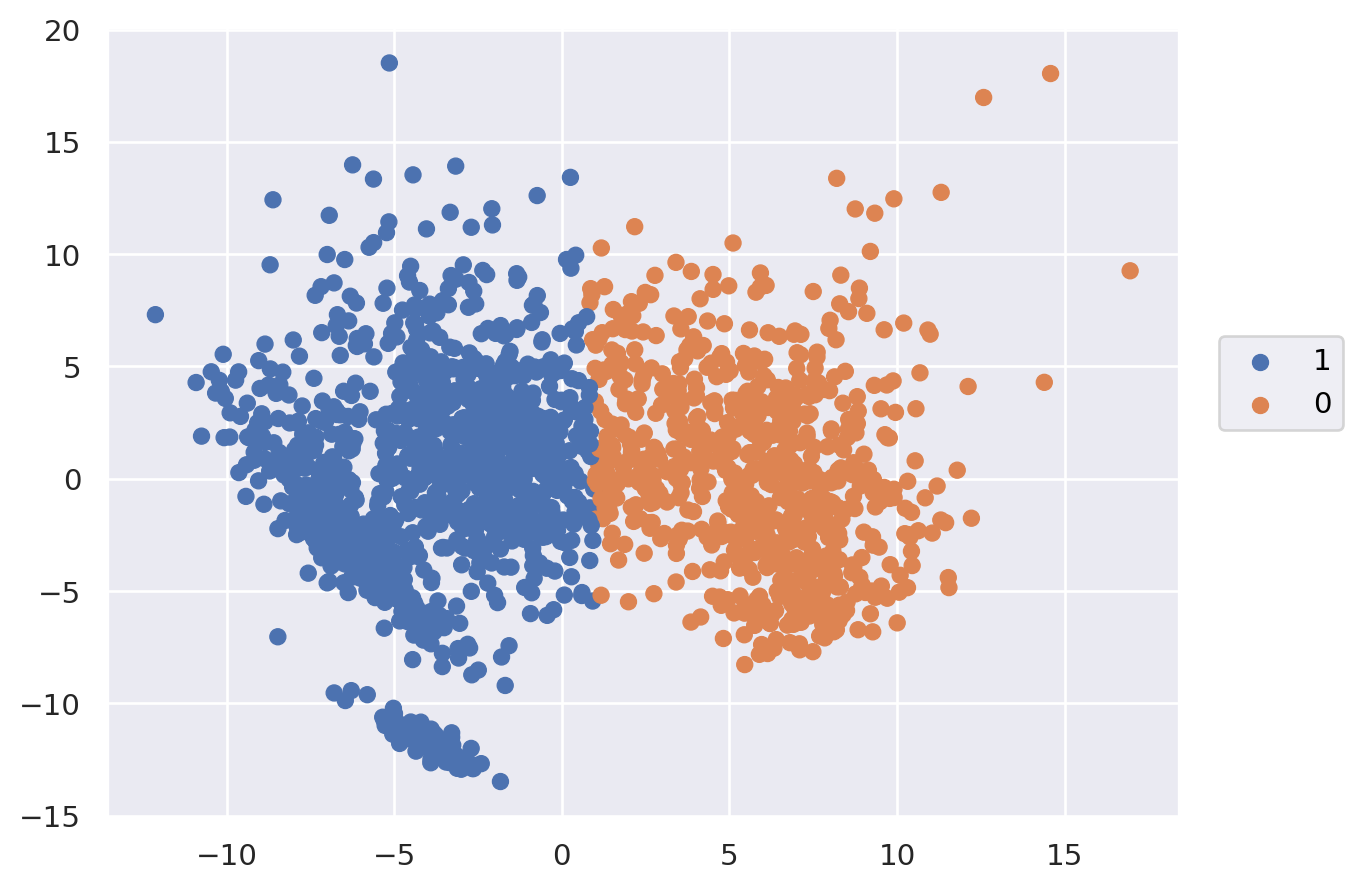

In [ ]:
(
    so.Plot(x = principalComponents[:,0],y = principalComponents[:,1], color=cluster.astype("str"))
    .add(so.Dot())
)

###d) Repetir el agrupamiento utilizando DBSCAN. ¿Como eligirían en este caso un valor de ε apropiado? Sugerencia: consultar la seccion ”Seleccion del hiperparametro eps” del Note-book de la clase de DBSCAN (o utilizar cualquier otra tecnica que consideren apropiada)

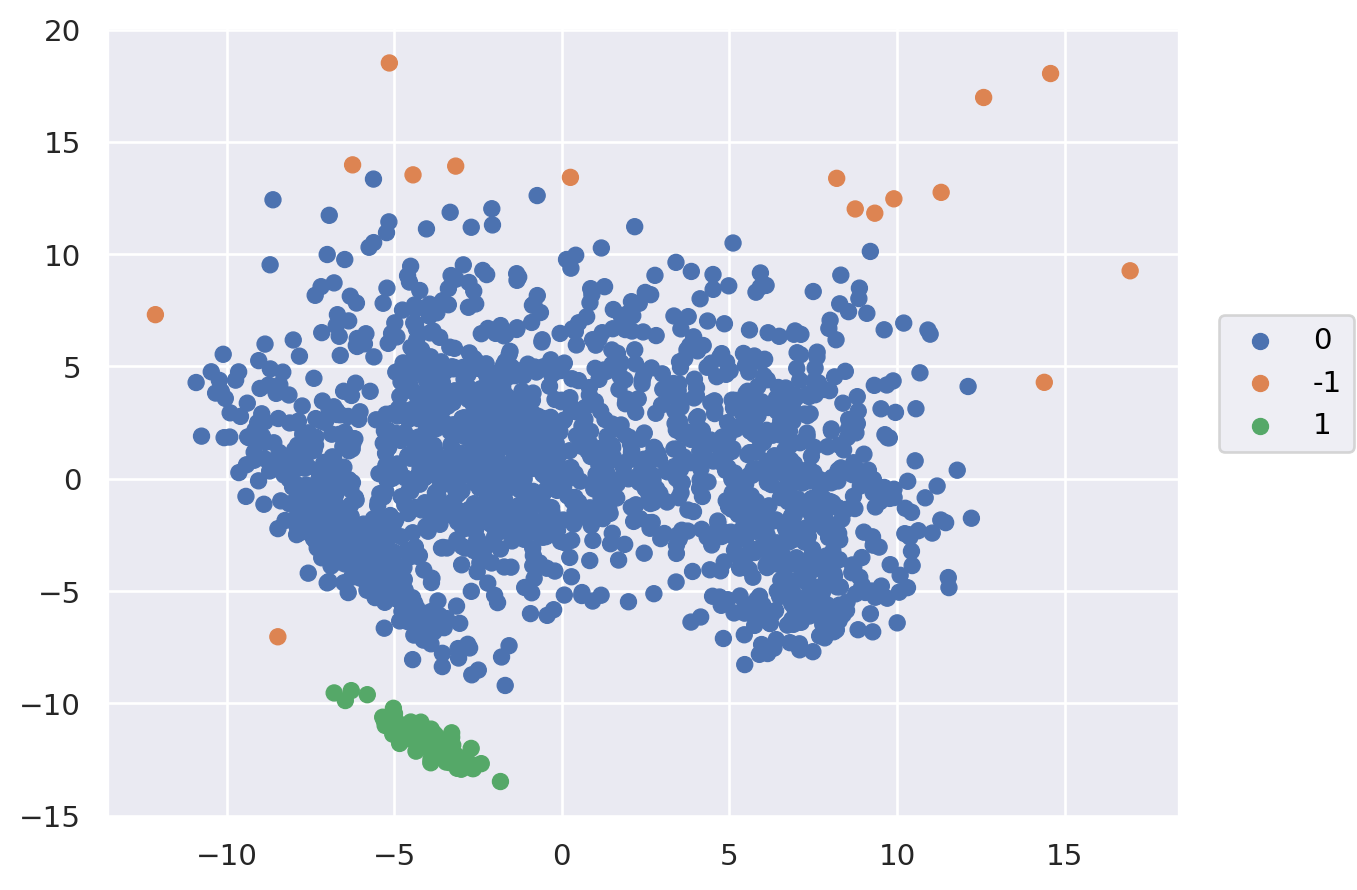

In [ ]:
clusters= DBSCAN(eps=2, min_samples = 6).fit_predict(principalComponents)

(
    so.Plot(x = principalComponents[:,0],y = principalComponents[:,1], color=clusters.astype("str"))
    .add(so.Dot())
)

Nosotras buscamos el eps óptimo, analizando las escalas (las distancias entre puntos) y probando a ojo con distintos gráficos.

###e) Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en vez de solo las dos componentes principales, modificando los valores de epsilon y minPts convenientemente. ¿Con cuál de las dos opciones obtienen mejores resultados?

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)  # Esta función nos devuelve los más cercanos incluyendo a si mismo, por eso tomamos 2.
neighbors_fit = neighbors.fit(df_std)

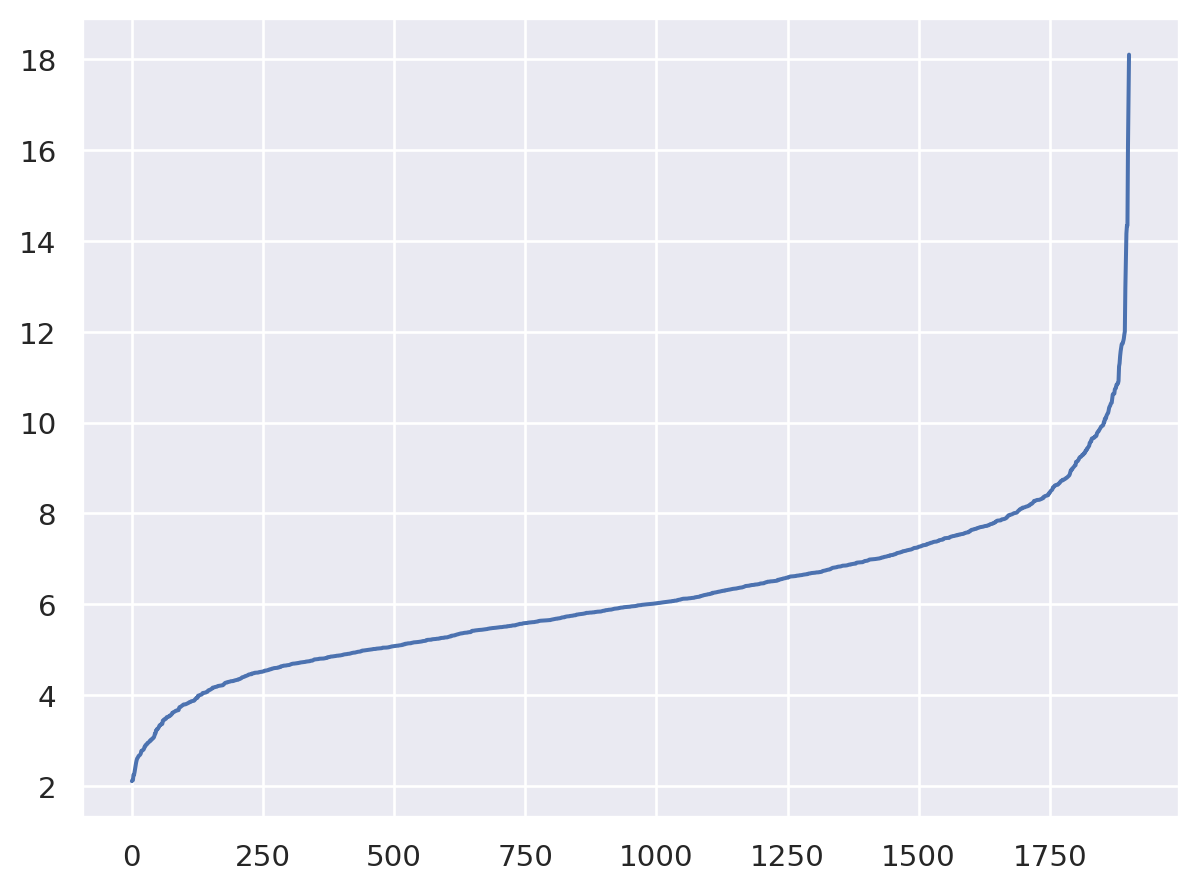

In [ ]:
# Ordenamos de menor a mayor las distancias y graficamos
distances, indices = neighbors_fit.kneighbors()
distances = distances[:,1]
distances = np.sort(distances, axis=0)

so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())

Elegimos el eps donde la curva hace un codo.

De esta forma tenemos un valor que incluye a la mayoría de los datos.

Tomamos eps = 9

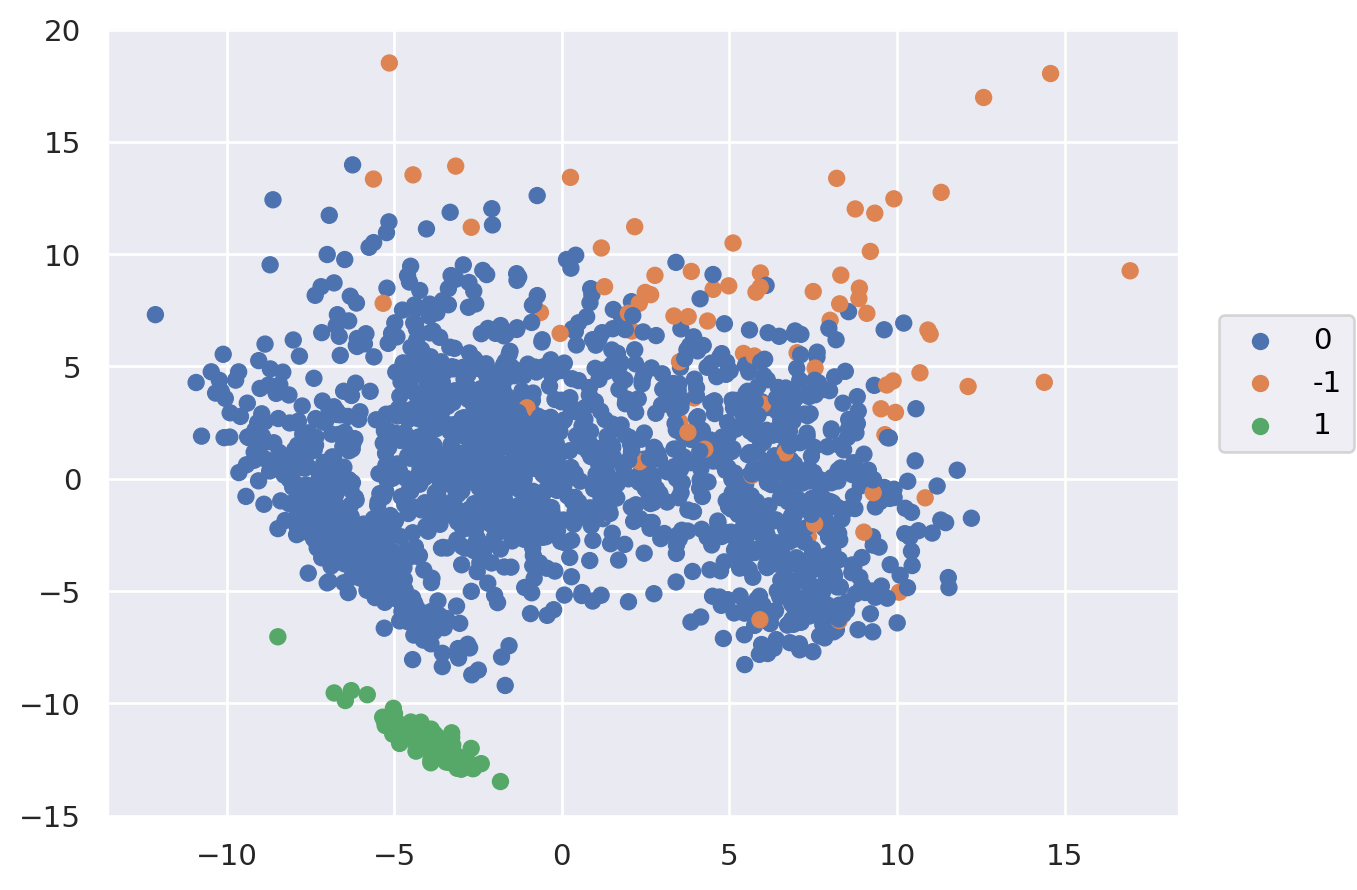

In [ ]:
clusters1= DBSCAN(eps=9, min_samples = 5).fit_predict(df_std) #con data_num escalado

(
    so.Plot(x = principalComponents[:,0],y = principalComponents[:,1], color=clusters1.astype("str"))
    .add(so.Dot())
)

#Clasificación [3 pts]

### 7. Ahora queremos poder predecir la posición en la que juega cada jugador según sus datos estadísticos utilizando KNN . En la columna Pos encontramos la posición de los jugadores.
### Para la mayoría de los jugadores se indica una única posición pero algunos jugadores tienen dos posiciones. Para simplificar el análisis vamos a considerar una única posición por jugador.

###a) Definir la variable Pos_filt que es la columna Pos, pero donde los jugadores deben tener una sola posición (pueden quedarse sólo con la primera posición de cada jugador o eliminar los jugadores con dos posiciones, lo que consideren más conveniente).

In [ ]:
Pos_filt = [x[:2] for x in FBRef.Pos]

###b) Dividir el DataFrame data_num y la Series Pos_filt utilizando un 80% para entrenamiento y un 20% para testeo

In [ ]:
y = Pos_filt
X = data_num

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

###c) Aplicar un esquema de validación en el conjunto de entrenamiento para seleccionar el valor óptimo de K. (Esto puede demorar mucho si prueban muchos valores de K, pueden hacerlo hasta un valor máximo de K = 20)
**Sugerencia**: puede resultar de ayuda KNeighborsClassifier de sklearn e investigar esa librería para aplicar esquemas de validación.

In [ ]:
#varios valores de K
for K in range(1,20,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train,y_train)
    y_pred = neighbor.predict(X_test)
    print(K, accuracy_score(y_test,y_pred))

1 0.7979002624671916
3 0.8083989501312336
5 0.800524934383202
7 0.8162729658792651
9 0.7979002624671916
11 0.8057742782152231
13 0.8031496062992126
15 0.8057742782152231
17 0.8057742782152231
19 0.800524934383202


### d) Para el valor de K obtenido, ¿cuál es el porcentaje de aciertos en el conjunto de testeo?

k = 7 es el óptimo con un porcentaje de aciertos de 81.62%

### e) Repetir el procedimiento utilizando la primeras dos componentes principales en vez de todas las variables. Indicar si se obtienen mejores resultados.

In [ ]:
X = principalComponents[:,:2]
y = Pos_filt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [ ]:
#varios valores de K
for K in range(1,20,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train,y_train)
    y_pred = neighbor.predict(X_test)
    print(K, accuracy_score(y_test,y_pred))

1 0.7165354330708661
3 0.7034120734908137
5 0.7296587926509186
7 0.7375328083989501
9 0.7349081364829396
11 0.7217847769028871
13 0.7322834645669292
15 0.7139107611548556
17 0.7296587926509186
19 0.7349081364829396


k = 7 es el óptimo con un porcentaje de aciertos de 73.75%

Por lo que notamos que obtenemos peores resultados

### 8. Repetir el mismo método de clasificación con el dataset de jugadoras de la liga inglesa femenina superleague2023.csv. Para esto, quedarse con la columna Pos y las columnas a partir de MP, inclusive. ¿Qué porcentaje de aciertos obtienen en este caso? ¿Puede modificarse el parámetro para obtener un porcentaje mayor?

In [ ]:
superleague = pd.read_csv("/content/drive/MyDrive/tp2 labo/superleague2023.csv")
superleague.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,1,Princess Ademiluyi,eng ENG,"MF,FW",West Ham,17.0,2006.0,11,0,87,...,0.0,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03
1,2,Michelle Agyemang,eng ENG,FW,Arsenal,17.0,2006.0,1,0,6,...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,3,Alyssa Aherne,eng ENG,MF,Everton,19.0,2004.0,1,0,1,...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,4,Olga Ahtinen,fi FIN,MF,Tottenham,NaN,NaN,16,10,923,...,0.1,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15
4,5,Asmita Ale,eng ENG,DF,Leicester City,21.0,2001.0,6,4,296,...,0.0,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06


In [ ]:
superleague["Pos"] = [x[:2] for x in superleague.Pos]
superleague = superleague.drop(["Rk", "Player", "Nation", "Squad", "Age", "Born"], axis = 1)
superleague

,Pos,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,MF,11,0,87,1.0,0,1,1,0,0,...,0.00,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03
1,FW,1,0,6,0.1,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,MF,1,0,1,0.0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,MF,16,10,923,10.3,1,2,3,1,0,...,0.10,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15
4,DF,6,4,296,3.3,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,DF,2,1,118,1.3,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
300,MF,22,22,"1,980",22.0,1,6,7,0,1,...,0.05,0.27,0.32,0.0,0.27,0.07,0.27,0.34,0.04,0.30
301,MF,20,18,"1,568",17.4,0,1,1,0,0,...,0.00,0.06,0.06,0.0,0.06,0.03,0.06,0.09,0.03,0.09
302,GK,18,18,"1,620",18.0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
y = superleague.Pos
X = superleague.drop(["Pos", "Min"], axis = 1)

Sacamos la columna Min porque tiene varios valores pasados como string

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [ ]:
for K in range(1,20,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train,y_train)
    y_pred = neighbor.predict(X_test)
    print(K, accuracy_score(y_test,y_pred))

1 0.639344262295082
3 0.7049180327868853
5 0.6557377049180327
7 0.6065573770491803
9 0.6065573770491803
11 0.639344262295082
13 0.6065573770491803
15 0.6229508196721312
17 0.6065573770491803
19 0.6229508196721312


Con k = 3 obtenemos el porcentaje de aciertos de 70.49%

In [ ]:
for K in range(1,100,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train,y_train)
    y_pred = neighbor.predict(X_test)
    print(K, accuracy_score(y_test,y_pred))

1 0.639344262295082
3 0.7049180327868853
5 0.6557377049180327
7 0.6065573770491803
9 0.6065573770491803
11 0.639344262295082
13 0.6065573770491803
15 0.6229508196721312
17 0.6065573770491803
19 0.6229508196721312
21 0.639344262295082
23 0.6229508196721312
25 0.639344262295082
27 0.6557377049180327
29 0.6721311475409836
31 0.6229508196721312
33 0.639344262295082
35 0.6557377049180327
37 0.6557377049180327
39 0.6229508196721312
41 0.6229508196721312
43 0.6065573770491803
45 0.639344262295082
47 0.6229508196721312
49 0.6229508196721312
51 0.6065573770491803
53 0.6065573770491803
55 0.6229508196721312
57 0.6065573770491803
59 0.6065573770491803
61 0.6065573770491803
63 0.5573770491803278
65 0.5901639344262295
67 0.5409836065573771
69 0.5573770491803278
71 0.5573770491803278
73 0.5245901639344263
75 0.5245901639344263
77 0.47540983606557374
79 0.4426229508196721
81 0.45901639344262296
83 0.45901639344262296
85 0.45901639344262296
87 0.45901639344262296
89 0.45901639344262296
91 0.4426229508

Notamos que cambiando el hiperparámetro, el porcentaje empeora

## Recomendaciones de jugadores [2 pts.]

###9. Trabajamos ahora con el dataset transfermarkt_fbref_201920.csv que incluye la valuación de los jugadores. Una de las aplicaciones más comunes de análisis de datos en el fútbol es para obtener recomendaciones de jugadores a comprar.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/tp2 labo/transfermarkt_fbref_201920.csv", delimiter =";")
data

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,21,Martin Aguirregabiria,es ESP,DF,Alavés,23,1996,4000000,178,Defender - Right-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
1,390,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
2,430,Ví­ctor Camarasa,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
3,737,Rubén Duarte,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
4,770,Rodrigo Ely,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,1997,Daniel Podence,pt POR,"FW,MF",Wolves,23,1995,12000000,165,Forward - Right Winger,...,1.55,47.1,34.8,12.3,0.32,24758,0,0,NaN,201920#
2640,2202,Romain Saïss,ma MAR,DF,Wolves,29,1990,4000000,188,Defender - Centre-Back,...,1.55,47.1,34.8,12.3,0.32,24758,0,0,NaN,201920#
2641,2523,Adama Traoré,es ESP,"FW,MF",Wolves,23,1996,25000000,178,Forward - Right Winger,...,1.55,47.1,34.8,12.3,0.32,24758,0,0,NaN,201920#
2642,2567,Jesús Vallejo,es ESP,DF,Wolves,22,1997,6000000,184,Defender - Centre-Back,...,1.55,47.1,34.8,12.3,0.32,24758,0,0,NaN,201920#


###a) En 2021 Messi fue transferido del Barcelona al PSG. Básandose en los datos disponibles, recomendarle a Barcelona un jugador de características similares a Messi pero de menor valor.


In [ ]:
messi = data[data["player"]=="Lionel Messi"]
messi

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
257,1649,Lionel Messi,ar ARG,"FW,MF",Barcelona,32,1987,112000000,170,Forward - Right Winger,...,2.16,66.4,36.0,30.4,0.8,54223,1,0,0.0,201920#


Elegimos buscar entre los jugadores que son solo delanteros o delanteros y mediocampistas

In [ ]:
posiciones = ["FW", "FW,MF", "MF,FW"]
data = data.dropna().reset_index(drop=True)
caracteristicas = data[(data["position"].isin(posiciones)) & (data["value"]<112000000) & (data["squad"]!="Barcelona")]
caracteristicas

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
1,390,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
7,1027,John Guidetti,se SWE,FW,Alavés,27,1992,1000000,185,Forward - Centre-Forward,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
8,1212,Joselu,es ESP,FW,Alavés,29,1990,5000000,191,Forward - Centre-Forward,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
11,1475,José Luis Rodrí­guez,pa PAN,FW,Alavés,21,1998,45000,180,Forward - Left Winger,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
15,1631,Édgar Méndez,es ESP,"MF,FW",Alavés,29,1990,1600000,187,Forward - Right Winger,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2125,Callum Robinson,ie IRL,FW,Sheffield Utd,24,1995,5000000,178,Forward - Left Winger,...,1.42,41.5,47.9,-6.4,-0.17,24370,0,0,0.0,201920#
2206,2300,Billy Sharp,eng ENG,FW,Sheffield Utd,33,1986,1000000,175,Forward - Centre-Forward,...,1.42,41.5,47.9,-6.4,-0.17,24370,0,0,0.0,201920#
2208,2718,Richairo Ĺ˝ivković,nl NED,FW,Sheffield Utd,22,1996,650,187,Forward - Centre-Forward,...,1.42,41.5,47.9,-6.4,-0.17,24370,0,0,0.0,201920#
2209,10,Che Adams,eng ENG,FW,Southampton,23,1996,12000000,179,Forward - Centre-Forward,...,1.37,53.9,53.1,0.9,0.02,23428,0,0,0.0,201920#


In [ ]:
# Seleccionamos características que nos parecen relevantes
features = ["xG", "Pts/G", "MP"]
X = caracteristicas[features]

# Aplicamos de KNN
knn = NearestNeighbors(n_neighbors=15)
knn.fit(X)

# Encontramos los vecinos más cercanos a Messi
distances, indices = knn.kneighbors(messi[features])

# Creamos un dataframe con los jugadores más similares
similar_players = caracteristicas.iloc[indices[0]]
print(similar_players[["xG", "Pts/G", "MP"]])
print(messi[features]) # datos de messi

        xG  Pts/G  MP
566   66.6   1.74  38
588   66.6   1.74  38
564   66.6   1.74  38
582   66.6   1.74  38
570   66.6   1.74  38
584   66.6   1.74  38
575   66.6   1.74  38
585   66.6   1.74  38
581   66.6   1.74  38
574   66.6   1.74  38
1129  68.4   2.05  38
1126  68.4   2.05  38
1127  68.4   2.05  38
1132  68.4   2.05  38
1121  68.4   2.05  38
       xG  Pts/G  MP
257  66.4   2.16  38


In [ ]:
# Seleccionamos características que nos parecen relevantes, agregamos xGA
features = ["xG", "Pts/G", "MP", "xGA"]
X = caracteristicas[features]

# Aplicamos de KNN
knn = NearestNeighbors(n_neighbors=15)
knn.fit(X)

# Encontramos los vecinos más cercanos a Messi
distances, indices = knn.kneighbors(messi[features])

# Creamos un dataframe con los jugadores más similares
similar_players = caracteristicas.iloc[indices[0]]
print(similar_players[["xG", "Pts/G", "MP", "xGA"]])
print(messi[features]) # datos de messi

        xG  Pts/G  MP   xGA
584   66.6   1.74  38  37.9
585   66.6   1.74  38  37.9
566   66.6   1.74  38  37.9
588   66.6   1.74  38  37.9
574   66.6   1.74  38  37.9
582   66.6   1.74  38  37.9
564   66.6   1.74  38  37.9
575   66.6   1.74  38  37.9
570   66.6   1.74  38  37.9
581   66.6   1.74  38  37.9
1672  62.5   1.63  38  39.3
1670  62.5   1.63  38  39.3
1662  62.5   1.63  38  39.3
1668  62.5   1.63  38  39.3
1678  62.5   1.63  38  39.3
       xG  Pts/G  MP   xGA
257  66.4   2.16  38  36.0


In [ ]:
pos = similar_players.index.unique()

In [ ]:
pos # estas son las posiciones de los jugadores con las características que elegimos similares a Messi

Index([584, 585, 566, 588, 574, 582, 564, 575, 570, 581, 1672, 1670, 1662,
       1668, 1678],
      dtype='int64')

In [ ]:
caracteristicas_parecidos = caracteristicas.loc[pos].drop([1672, 1670, 1662,
       1668, 1678], axis=0)

Descartamos los jugadores que no aparecen en ambos análisis/ ambas series así podemos hacer un análisis más exhaustivo

In [ ]:
caracteristicas_parecidos

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
584,1919,Pedro,es ESP,FW,Chelsea,32,1987,7500000,167,Forward - Right Winger,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
585,2031,Christian Pulisic,us USA,FW,Chelsea,20,1998,54000000,172,Forward - Left Winger,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
566,97,Faustino Anjorin,eng ENG,FW,Chelsea,17,2001,2000000,186,Midfielder - Attacking Midfield,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
588,2666,Willian,br BRA,FW,Chelsea,30,1988,19000000,175,Forward - Right Winger,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
574,957,Olivier Giroud,fr FRA,FW,Chelsea,32,1986,7000000,193,Forward - Centre-Forward,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
582,1716,Mason Mount,eng ENG,"MF,FW",Chelsea,20,1999,40000000,178,Midfielder - Attacking Midfield,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
564,7,Tammy Abraham,eng ENG,FW,Chelsea,21,1997,40000000,191,Forward - Centre-Forward,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
575,1121,Callum Hudson-Odoi,eng ENG,FW,Chelsea,18,2000,31000000,177,Forward - Left Winger,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
570,219,Michy Batshuayi,be BEL,FW,Chelsea,25,1993,17000000,184,Forward - Centre-Forward,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
581,1438,Ruben Loftus-Cheek,eng ENG,"MF,FW",Chelsea,23,1996,24000000,191,Midfielder - Central Midfield,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#


Nos parece interesante que todos los jugadores sean del Chelsea.

Obervamos que Tammy Abraham	tiene valores parecidos a los de Messi (de las categorías que elegimos) y el precio es mucho menor por lo que creemos que sería un buen candidato a considerar. Pero antes de elegirlo hacemos un último análisis.

Por otro lado, si bien tienen características similares, descartamos a los jugadores que tienen edad menor o igual a 20 porque suelen tener poca experiencia y si queremos reemplazar a Messi, sabiendo como se desempeña en el juego, vamos a querer a alguien más experimentado.

In [ ]:
caracteristicas_parecidos = caracteristicas_parecidos.drop([585, 566, 582, 575], axis=0)
caracteristicas_parecidos

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
584,1919,Pedro,es ESP,FW,Chelsea,32,1987,7500000,167,Forward - Right Winger,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
588,2666,Willian,br BRA,FW,Chelsea,30,1988,19000000,175,Forward - Right Winger,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
574,957,Olivier Giroud,fr FRA,FW,Chelsea,32,1986,7000000,193,Forward - Centre-Forward,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
564,7,Tammy Abraham,eng ENG,FW,Chelsea,21,1997,40000000,191,Forward - Centre-Forward,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
570,219,Michy Batshuayi,be BEL,FW,Chelsea,25,1993,17000000,184,Forward - Centre-Forward,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
581,1438,Ruben Loftus-Cheek,eng ENG,"MF,FW",Chelsea,23,1996,24000000,191,Midfielder - Central Midfield,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#


Analizamos el promedio de la columna value

In [ ]:
caracteristicas_parecidos["value"].mean()

19083333.333333332

Finalmente, consideramos que el jugador Willian es la mejor opción para el Barcelona porque aunque tiene 30 años, la mayoría de los contratos suelen tener una duración de entre 2 a 5 años. Por otro lado, entre los jugadores que nos quedaron, es el que tiene un valor más cercano al promedio por lo que el Barcelona se quedaría con una gran ganancia. Otra cosa que notamos es que la altura es similar a la de Messi y también es de Sudamérica.

Tammy sigue siendo una buena opción pero notamos que su valor es más elevado con respecto a Willian, y por esta razón no lo elegimos.

###b) Queremos elaborar un modelo para detectar jugadores “baratos”, es decir cuya valuación en el mercado (columna value) sea inferior a que la que nosotros estimemos. Para esto, quisiéramos ajustar el valor de mercado a partir de los datos de los jugadores (para estimar la valuación pueden incorporar la edad entre las variables explicativas).

El modelo que desarrollen puede basarse en redes neuronales o en otro modelo que consideren adecuado.


In [ ]:
#!pip install tensorflow
#!pip install keras
#!pip install --upgrade keras
#!pip install ipympl

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


  Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [ ]:
# Nos quedamos solo con las variables numéricas
datavalores = data.dropna().reset_index(drop = True)
datavalores

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,21,Martin Aguirregabiria,es ESP,DF,Alavés,23,1996,4000000,178,Defender - Right-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
1,390,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
2,430,Ví­ctor Camarasa,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
3,737,Rubén Duarte,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
4,770,Rodrigo Ely,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,288,Ryan Bertrand,eng ENG,DF,Southampton,29,1989,10000000,179,Defender - Left-Back,...,1.37,53.9,53.1,0.9,0.02,23428,0,0,0.0,201920#
2213,339,Sofiane Boufal,ma MAR,"MF,FW",Southampton,25,1993,8000000,175,Forward - Left Winger,...,1.37,53.9,53.1,0.9,0.02,23428,0,0,0.0,201920#
2214,619,Kevin Danso,at AUT,DF,Southampton,20,1998,6000000,190,Defender - Centre-Back,...,1.37,53.9,53.1,0.9,0.02,23428,0,0,0.0,201920#
2215,701,Moussa Djenepo,ml MLI,"MF,DF",Southampton,21,1998,11000000,177,Forward - Left Winger,...,1.37,53.9,53.1,0.9,0.02,23428,0,0,0.0,201920#


Elegimos las columnas que nos parecen relevantes

In [ ]:
# Definimos las variables.
X = datavalores[['age', 'minutes', 'goals', "assists", "xGA", "xG"]]    # Elegimos algunas columnas salvo value
y = datavalores[['value']]

# Escalamos los datos entre 0 y 1
scaler = MinMaxScaler()
X_scaled = scaler.set_output(transform='pandas').fit_transform(X)
y_scaled = scaler.set_output(transform='pandas').fit_transform(y)

# Escalamos y centramos X, definimos conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Activation
from keras.activations import relu
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
keras.utils.set_random_seed(11)

# Paso 1: iniciamos el modelo indicando la arquitectura de la red
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),   # Capa de input: indicamos que el input tiene dimension 4
    keras.layers.Dense(3,                            # Capa oculta: el output tiene dimension 3
                       activation='sigmoid'),        # y su funcion de activacion es la sigmoidea
    keras.layers.Dense(1,                            # Capa de output: el output tiene dimension 1
                       activation='tanh')            # y su funcion de activacion es la relu.
])

# Paso 2: configuramos el optimizador
optimizer = keras.optimizers.SGD(learning_rate=0.05)

# Paso 3: construimos el modelo
model.compile(
    optimizer=optimizer,
    loss='mean_squared_error',     # Funcion de perdida para clasificacion con mas de dos categorias
)

# Paso 4: entrenamiento del modelo.
hist = model.fit(X_train, y_train,
                 epochs=200,           # como sabemos cuantas capas usar?
                 batch_size=20,
                 validation_split=0.2,
                 verbose=0,
                 )

# Paso 5: calculamos el error en el conjunto de testeo
model.evaluate(X_test, y_test,
               verbose=0,
               return_dict=True
               )

{'loss': 0.004234036430716515}

In [ ]:
# Armamos una funcion para graficar el error a través de las épocas
def graficar_error(history, error_name):
    x_arr = np.array(history.epoch)    # en el atributo epoch, history guarda una lista de epocas
    plot = (
        so.Plot()
        .add(so.Line(color='blue'), x=x_arr, y=history.history[error_name], label='Entrenamiento')
        .add(so.Line(color='orange'), x=x_arr, y=history.history[f'val_{error_name}'], label='Validacion')
        .label(title=error_name)
    )
    plot.show()

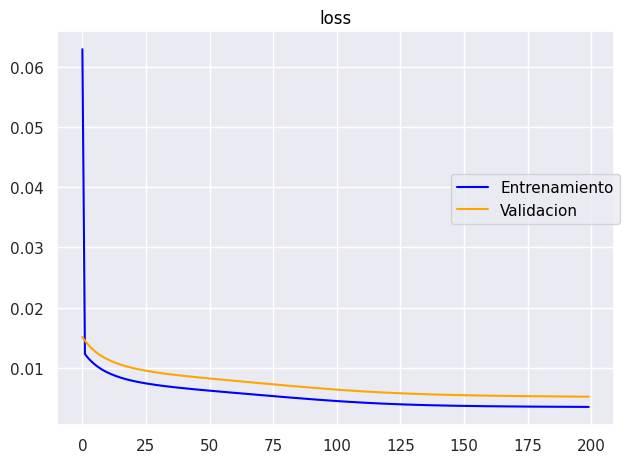

In [ ]:
# Graficamos la evolucion de la precision de la clasficiacion
graficar_error(hist, 'loss')

In [ ]:
y_pred = model.predict(X_scaled)
y_original = scaler.inverse_transform(y_pred)
print(y_original)
print(r2_score)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 8457750. ]
 [ 7097996. ]
 [ 3246306.5]
 ...
 [ 8400584. ]
 [12682922. ]
 [ 8372128. ]]
<function r2_score at 0x7fa8ffad8430>


In [ ]:
#y_original.astype(int)

In [ ]:
datavalores["valor predicho"] = y_original
datavalores["diferencia"] = datavalores["value"] - datavalores["valor predicho"]

De la columna diferencia, los valores negativos son los jugadores infravalorados mientras que los positivos son los sobrevalorados.

In [ ]:
datavalores.head()

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,valor predicho,diferencia
0,21,Martin Aguirregabiria,es ESP,DF,Alavés,23,1996,4000000,178,Defender - Right-Back,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,8457750.0,-4457750.0
1,390,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,7097996.0,-3097996.0
2,430,Ví­ctor Camarasa,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,3246306.5,753693.5
3,737,Rubén Duarte,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,10602879.0,-6602879.0
4,770,Rodrigo Ely,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,6676617.0,-5676617.0


###c) Según el modelo desarrollado, entre los jugadores con un valor de mercado mayor a $100000, ¿quién es el más sobrevalorado? Es decir, el jugador con mayor diferencia entre el valor de mercado y el valor predicho por el modelo. ¿Y el más infravalorado?

In [ ]:
datamayoresa100000 = datavalores[(datavalores["value"]>100000)]
datamayoresa100000 = datamayoresa100000.set_index("player")
datamayoresa100000

,Column1,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,valor predicho,diferencia
player,,,,,,,,,,,,,,,,,,,,,
Martin Aguirregabiria,21,es ESP,DF,Alavés,23,1996,4000000,178,Defender - Right-Back,right,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,8457750.0,-4457750.0
Oliver Burke,390,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,right,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,7097996.0,-3097996.0
Ví­ctor Camarasa,430,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,right,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,3246306.5,753693.5
Rubén Duarte,737,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,left,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,10602879.0,-6602879.0
Rodrigo Ely,770,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,right,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,6676617.0,-5676617.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ryan Bertrand,288,eng ENG,DF,Southampton,29,1989,10000000,179,Defender - Left-Back,left,...,53.1,0.9,0.02,23428,0,0,0.0,201920#,14654860.0,-4654860.0
Sofiane Boufal,339,ma MAR,"MF,FW",Southampton,25,1993,8000000,175,Forward - Left Winger,right,...,53.1,0.9,0.02,23428,0,0,0.0,201920#,8735336.0,-735336.0
Kevin Danso,619,at AUT,DF,Southampton,20,1998,6000000,190,Defender - Centre-Back,right,...,53.1,0.9,0.02,23428,0,0,0.0,201920#,8400584.0,-2400584.0


In [ ]:
datamayoresa100000["diferencia"].idxmax()

'Kylian Mbappé'

In [ ]:
datamayoresa100000["diferencia"].idxmin()

'Papu Gómez'

:(

In [ ]:
datamayoresa100000.loc["Papu Gómez"]

Column1                  977
nationality           ar ARG
position               MF,FW
squad               Atalanta
age                       31
                     ...    
WinCL                      0
CLBestScorer             0.0
Season               201920#
valor predicho    43963804.0
diferencia       -28963804.0
Name: Papu Gómez, Length: 401, dtype: object

Según nuestro modelo el jugador más sobrevalorado es Kylian Mbappé y el jugador más infravalorado es Papu Gómez.

###d) El PSG quiere vender a Mbappé y reemplazarlo por otro jugador más barato. Hacer un listado de los 10 jugadores más parecidos a Mbappé según el criterio que elijan. De esos 10 jugadores, según el modelo que desarrollaron en el ítem anterior, ¿a qué jugador recomendarían teniendo en cuenta la valuación del mercado y la predicción del modelo? Para ese jugador, averiguar la valuación actual del jugador. ¿Hicieron una buena recomendación?

In [ ]:
mbappe = datavalores[datavalores["player"]=="Kylian Mbappé"]
mbappe

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,valor predicho,diferencia
1843,1602,Kylian Mbappé,fr FRA,FW,Paris S-G,20,1998,180000000,178,Forward - Left Winger,...,22.7,48.2,1.78,47517,1,0,0.0,201920#,37803580.0,142196420.0


In [ ]:
caracteristicas = datavalores[(datavalores["position"]=="FW") & (datavalores["value"]<180000000) & (datavalores["squad"]!="Paris S-G")]
caracteristicas

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,valor predicho,diferencia
7,1027,John Guidetti,se SWE,FW,Alavés,27,1992,1000000,185,Forward - Centre-Forward,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,-4431103.50,5431103.50
8,1212,Joselu,es ESP,FW,Alavés,29,1990,5000000,191,Forward - Centre-Forward,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,13043406.00,-8043406.00
11,1475,José Luis Rodrí­guez,pa PAN,FW,Alavés,21,1998,45000,180,Forward - Left Winger,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,-1283000.00,1328000.00
18,1950,Lucas Pérez,es ESP,FW,Alavés,30,1988,12000000,180,Forward - Centre-Forward,...,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#,14476907.00,-2476907.00
38,947,Saman Ghoddos,ir IRN,FW,Amiens,25,1993,3000000,177,Midfielder - Attacking Midfield,...,35.5,-8.7,-0.31,11616,0,0,0.0,201920#,-3227984.75,6227984.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1718,Lys Mousset,fr FRA,FW,Sheffield Utd,23,1996,9000000,184,Forward - Centre-Forward,...,47.9,-6.4,-0.17,24370,0,0,0.0,201920#,12588012.00,-3588012.00
2203,2125,Callum Robinson,ie IRL,FW,Sheffield Utd,24,1995,5000000,178,Forward - Left Winger,...,47.9,-6.4,-0.17,24370,0,0,0.0,201920#,4134461.50,865538.50
2206,2300,Billy Sharp,eng ENG,FW,Sheffield Utd,33,1986,1000000,175,Forward - Centre-Forward,...,47.9,-6.4,-0.17,24370,0,0,0.0,201920#,2480399.00,-1480399.00
2208,2718,Richairo Ĺ˝ivković,nl NED,FW,Sheffield Utd,22,1996,650,187,Forward - Centre-Forward,...,47.9,-6.4,-0.17,24370,0,0,0.0,201920#,1264819.00,-1264169.00


In [ ]:
# Seleccionamos características que nos parecen relevantes
features = ["xG", "Pts/G", "MP"]
X = caracteristicas[features]

# Aplicamos de KNN
knn = NearestNeighbors(n_neighbors=10)
knn.fit(X)

# Encontramos los vecinos más cercanos a Messi
distances, indices = knn.kneighbors(mbappe[features])

# Creamos un dataframe con los jugadores más similares
similar_players = caracteristicas.iloc[indices[0]]
print(similar_players[["xG", "Pts/G", "MP"]])
print(mbappe[features]) # datos de mbappe

        xG  Pts/G  MP
1905  70.9   1.94  34
1900  70.9   1.94  34
1903  70.9   1.94  34
1519  66.4   1.91  34
1513  66.4   1.91  34
1511  66.4   1.91  34
1518  66.4   1.91  34
1317  71.5   2.61  38
1321  71.5   2.61  38
1320  71.5   2.61  38
        xG  Pts/G  MP
1843  70.9   2.52  27


In [ ]:
pos = similar_players.index.unique()
pos

Index([1910, 1921, 1917, 1908, 1929, 1905, 1903, 1900, 295, 286], dtype='int64')

In [ ]:
caracteristicas_parecidos = caracteristicas.loc[pos]
caracteristicas_parecidos

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,valor predicho,diferencia
1910,266,Karim Benzema,fr FRA,FW,Real Madrid,31,1987,32000000,184,Forward - Centre-Forward,...,28.4,35.1,0.92,45833,1,0,0.0,201920#,38868636.0,-6868636.0
1921,1546,Mariano,do DOM,FW,Real Madrid,25,1993,12000000,180,Forward - Centre-Forward,...,28.4,35.1,0.92,45833,1,0,0.0,201920#,12000520.0,-520.0
1917,1218,Luka Jović,rs SRB,FW,Real Madrid,21,1997,22000000,182,Forward - Centre-Forward,...,28.4,35.1,0.92,45833,1,0,0.0,201920#,17652028.0,4347972.0
1908,129,Marco Asensio,es ESP,FW,Real Madrid,23,1996,32000000,182,Forward - Left Winger,...,28.4,35.1,0.92,45833,1,0,0.0,201920#,16441509.0,15558491.0
1929,2143,Rodrygo,br BRA,FW,Real Madrid,18,2001,45000000,174,Forward - Right Winger,...,28.4,35.1,0.92,45833,1,0,0.0,201920#,21039570.0,23960430.0
1905,2656,Timo Werner,de GER,FW,RB Leipzig,23,1996,64000000,181,Forward - Centre-Forward,...,36.4,34.5,1.01,28819,1,0,0.0,201920#,46196088.0,17803912.0
1903,2264,Patrik Schick,cz CZE,FW,RB Leipzig,23,1996,20000000,187,Forward - Centre-Forward,...,36.4,34.5,1.01,28819,1,0,0.0,201920#,26388458.0,-6388458.0
1900,2013,Yussuf Poulsen,dk DEN,FW,RB Leipzig,25,1994,24000000,192,Forward - Centre-Forward,...,36.4,34.5,1.01,28819,1,0,0.0,201920#,27041468.0,-3041468.0
295,2717,Joshua Zirkzee,nl NED,FW,Bayern Munich,18,2001,6000000,193,Forward - Centre-Forward,...,34.3,48.0,1.41,57353,1,0,0.0,201920#,25233712.0,-19233712.0
286,1827,Kwasi Okyere Wriedt,gh GHA,FW,Bayern Munich,25,1994,80000,188,Forward - Centre-Forward,...,34.3,48.0,1.41,57353,1,0,0.0,201920#,18136902.0,-18056902.0


In [ ]:
caracteristicas_parecidos.diferencia.idxmin()

295

Finalmente la recomendación para reemplazar a Mbappé es Joshua Zirkzee.

Según los datos de diferencia, está infravalorado y su valor real es bastante más chico que el de Mbappé.  